In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
import pickle

In [126]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [128]:
df.shape

(51717, 17)

In [129]:
df.drop(columns=['url','dish_liked','phone'],axis=1,inplace=True)

In [130]:
df.shape

(51717, 14)

In [131]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

43
(51674, 14)


In [132]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [133]:
df.dropna(inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [135]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [136]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [137]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [138]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [140]:
df['cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,   1.7 ,   1.4 ,   1.35,
         2.2 ,   2.  ,   1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,
         3.  ,   2.8 ,   3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,
         2.4 ,   2.6 ,   1.45,  70.  ,   3.2 , 560.  , 240.  , 360.  ,
         6.  ,   1.05,   2.3 ,   4.1 , 120.  ,   5.  ,   3.7 ,   1.65,
         2.7 ,   4.5 ])

In [141]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [142]:
df = df.loc[df.rate!='NEW']
print(df.shape)
df = df.loc[df.rate!='-'].reset_index(drop=True)
print(df.shape)
rmv_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(rmv_slash).str.strip().astype('float')
df['rate'].unique()

(41302, 14)
(41237, 14)


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [143]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True,False),inplace=True)
df.book_table.replace(('Yes','No'),(True,False),inplace=True)
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [144]:
data = df.copy()

In [145]:
for i in df.columns[~df.columns.isin(['rate','cost','votes'])]:
    df[i] = df[i].factorize()[0]
    
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


<AxesSubplot:>

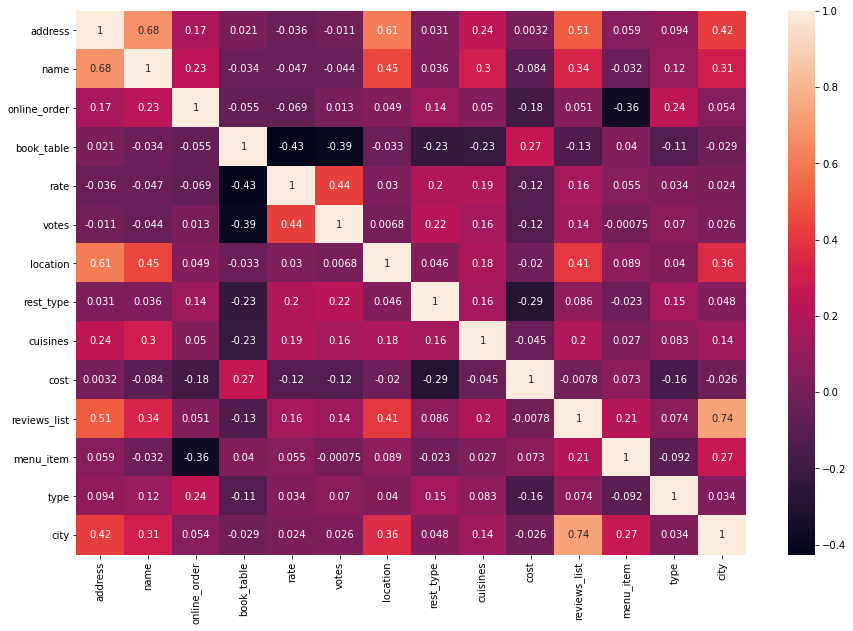

In [146]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [147]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0


In [149]:
x = df.iloc[:,[2,3,5,6,7,8,9,11]]
y = df['rate']

In [150]:
x.head(3)

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,0,0,775,0,0,0,800.0,0
1,0,1,787,0,0,1,800.0,0
2,0,1,918,0,1,2,800.0,0


In [151]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,random_state=300)

In [249]:
##############################################################

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delivering online or Not')

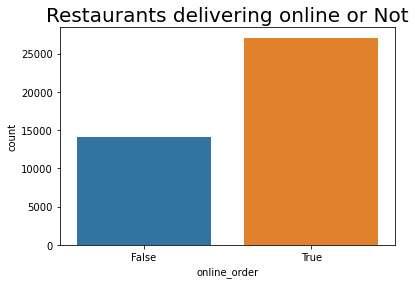

In [248]:
sns.countplot(data['online_order'])
plt.title('Restaurants delivering online or Not',size=20)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restuarants Allowing Table Booking or not')

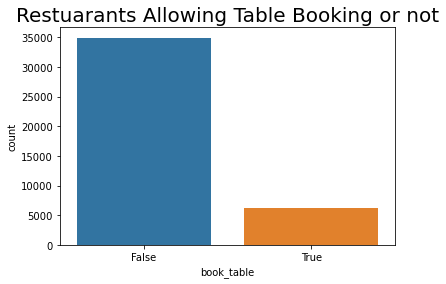

In [247]:
sns.countplot(data['book_table'])
plt.title('Restuarants Allowing Table Booking or not',size=20)

Text(0.5, 1.0, 'Table Booking vs Normal Rate')

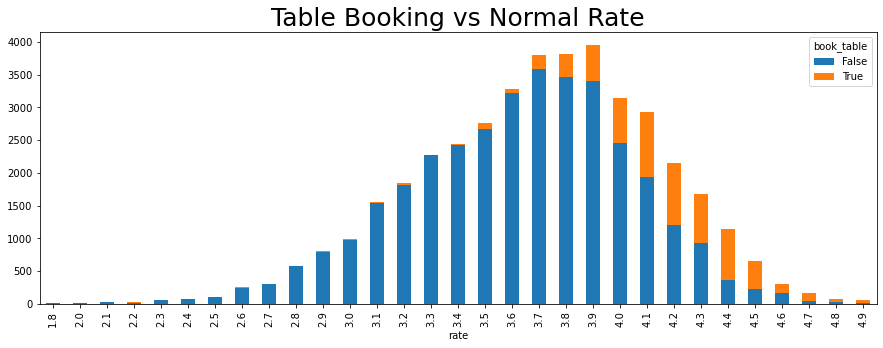

In [244]:
xx = pd.crosstab(data['rate'],data['book_table'])
xx.plot(kind='bar',stacked=True,figsize=(15,5))
plt.title('Table Booking vs Normal Rate',size=25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'LocationWise Count of Restuarants')

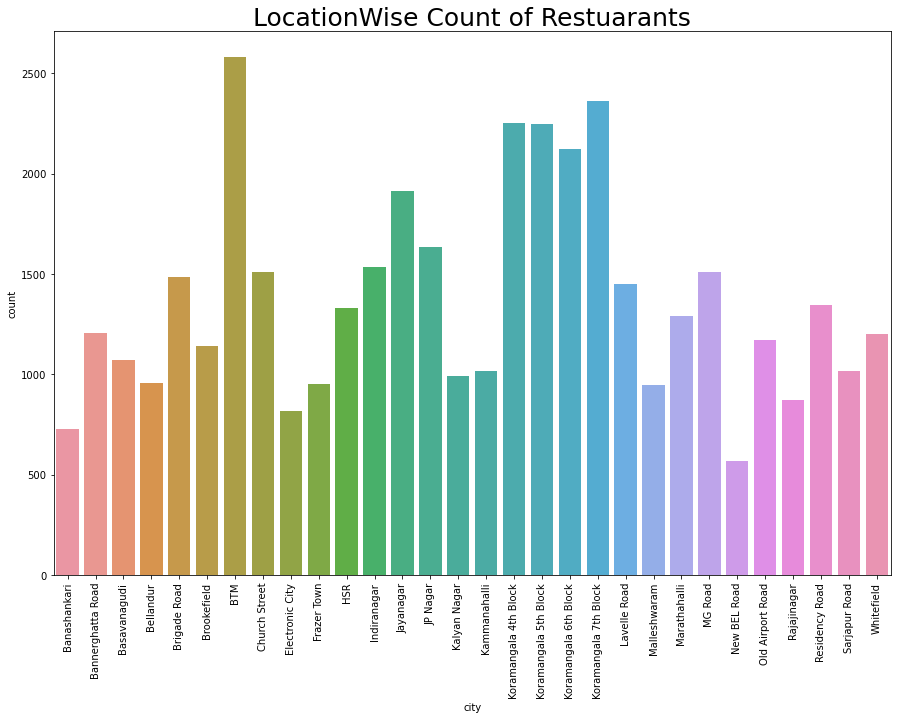

In [241]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data['city'])
plt.title('LocationWise Count of Restuarants',fontsize=25)

Text(0.5, 1.0, 'Locationwise Rating')

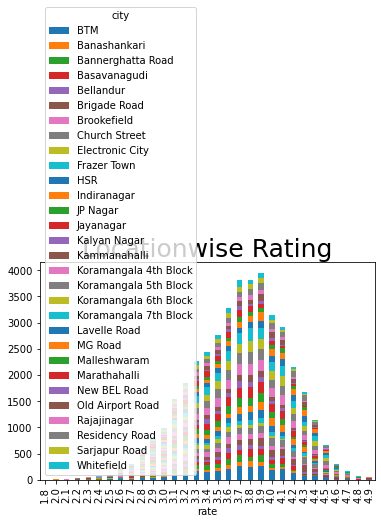

In [238]:
xx = pd.crosstab(data['rate'],data['city'])
xx.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restuarant Type')

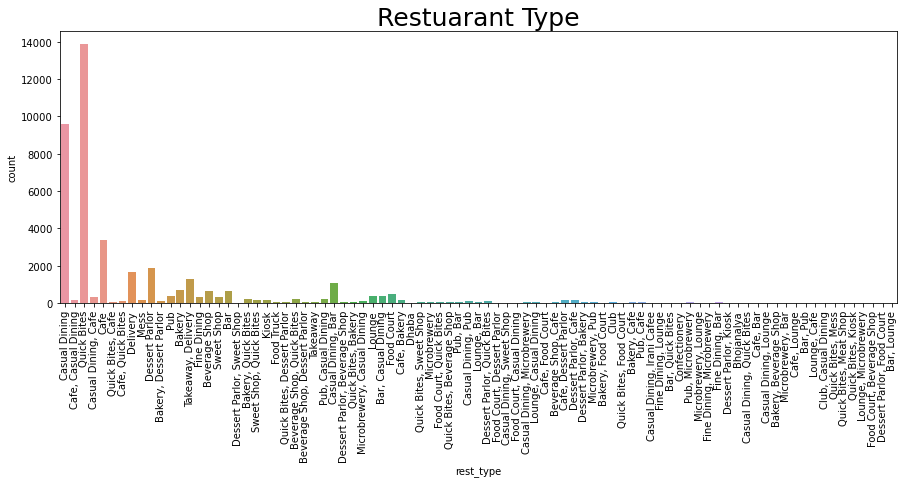

In [237]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(data['rest_type'])
plt.title('Restuarant Type',size=25)

Text(0.5, 1.0, 'RestType Rating')

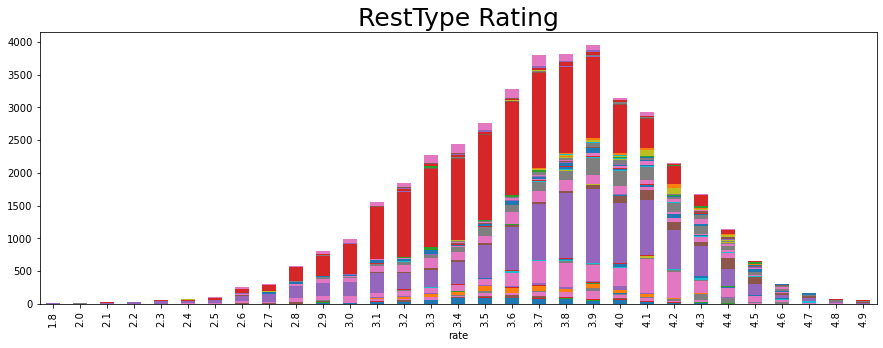

In [235]:
xx = pd.crosstab(data['rate'],data['rest_type'])
xx.plot(kind='bar',stacked=True,figsize=(15,5))
plt.legend().remove()
plt.title('RestType Rating',size=25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type of Service')

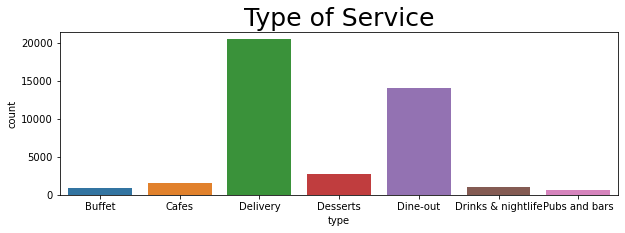

In [233]:
plt.figure(figsize=(10,3))
sns.countplot(data['type'])
plt.title('Type of Service',size=25)

Text(0.5, 1.0, 'Type - Rating')

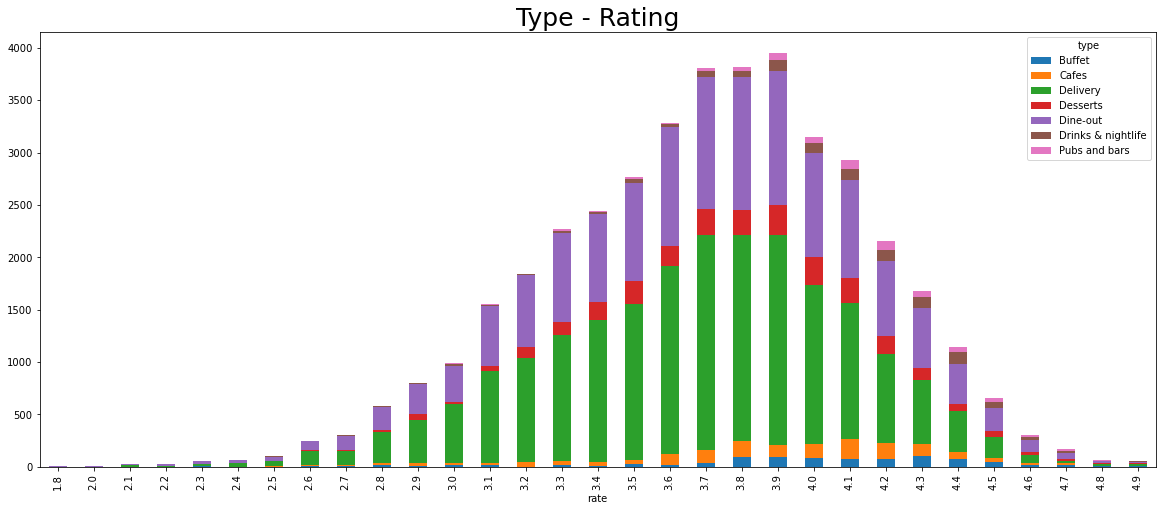

In [232]:
xx = pd.crosstab(data['rate'],data['type'])
xx.plot(kind='bar',stacked=True,figsize=(20,8))
plt.title('Type - Rating',size=25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cost of Restuarant')

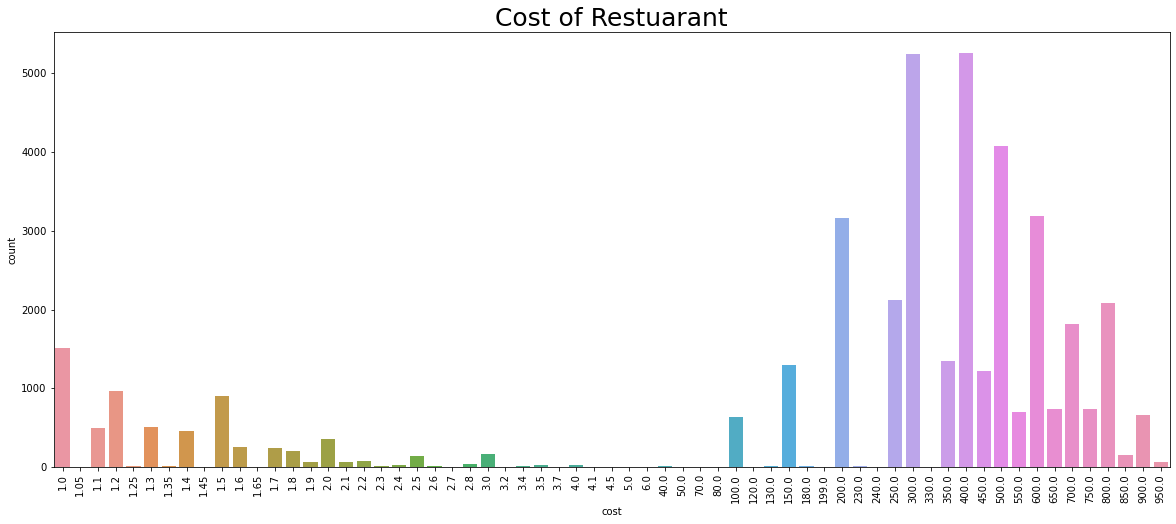

In [231]:
plt.figure(figsize=(20,8))
loc = sns.countplot(data['cost'])
loc.set_xticklabels(loc.get_xticklabels(), rotation=90)
loc
plt.title('Cost of Restuarant',size = 25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NO. of restaurants in a Location')

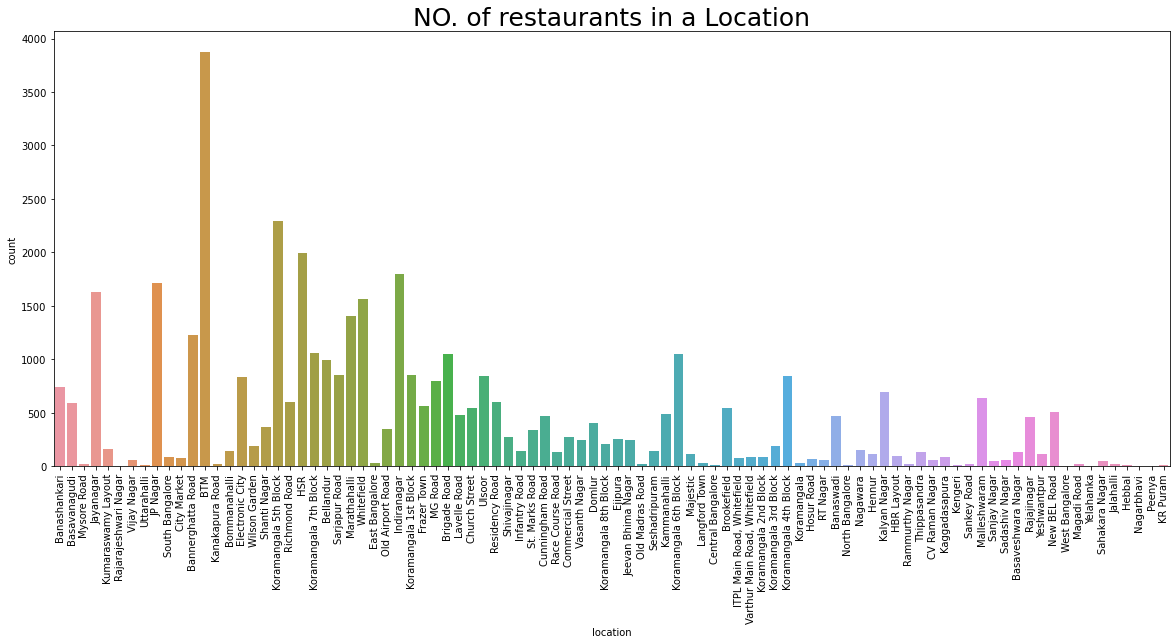

In [230]:
plt.figure(figsize=(20,8))
loc = sns.countplot(data['location'])
loc.set_xticklabels(loc.get_xticklabels(), rotation=90)
loc
plt.title('NO. of restaurants in a Location',size = 25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurant Types in Bangaluru')

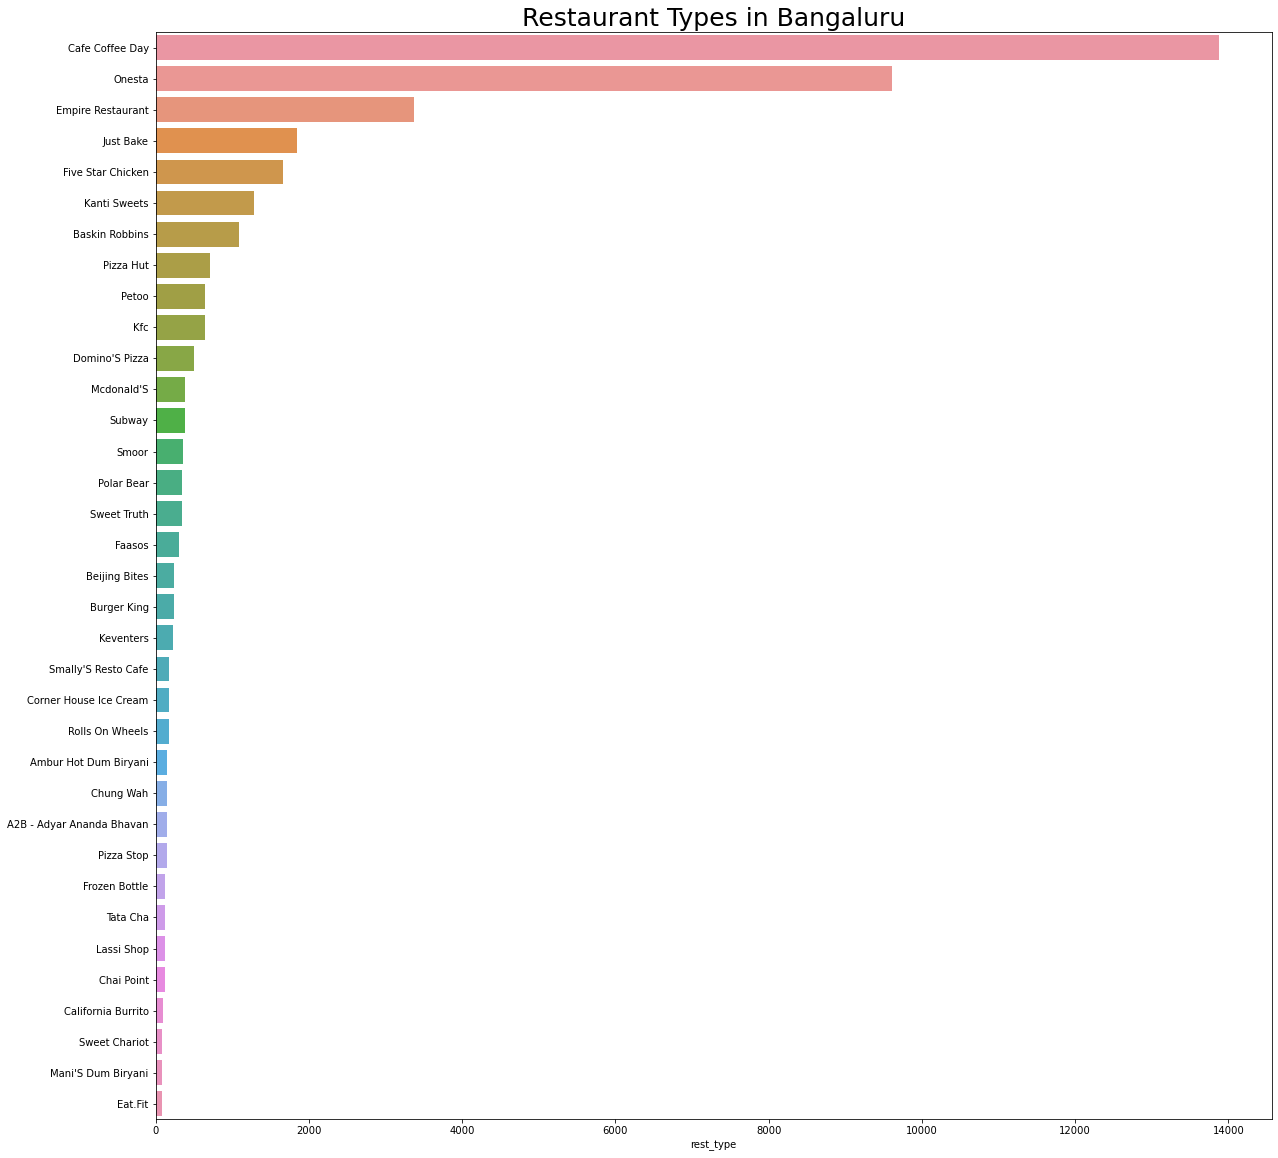

In [226]:
plt.figure(figsize=(20,20))
sns.barplot(data['rest_type'].value_counts()[:35],data.name.value_counts().index[:35])
plt.title("Restaurant Types in Bangaluru",size=25)

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most famous restaurant chains in Bangaluru')

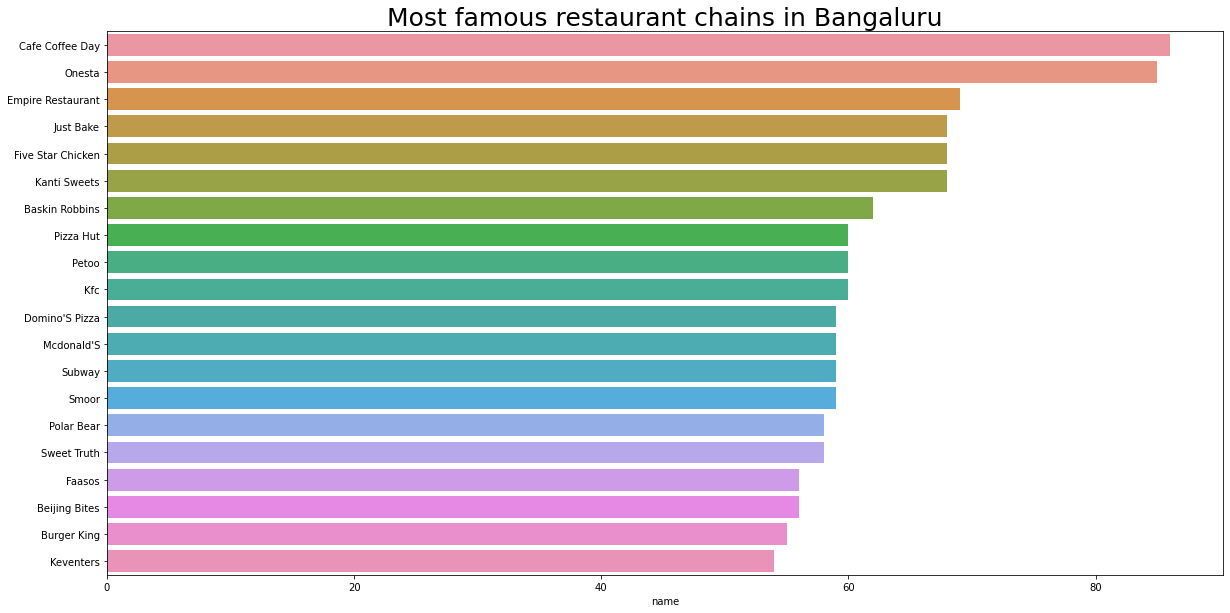

In [215]:
plt.figure(figsize=(20,10))
sns.barplot(data['name'].value_counts()[:20],data.name.value_counts().index[:20])
plt.title("Most famous restaurant chains in Bangaluru",size=25)

In [250]:
######################################################################################

In [254]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_predict = dtr.predict(x_test)
r2_score(y_test,y_predict)

0.7836159239363417

In [256]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predict = rfr.predict(x_test)
r2_score(y_test,y_predict)

0.8691555732174221

In [258]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
y_predict = etr.predict(x_test)
r2_score(y_test,y_predict)

0.8838791653468896

In [260]:
pickle.dump(etr, open('zomato.pkl','wb'))